In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV file
df=pd.read_csv('Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#droping column
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.shape

(300153, 11)

In [7]:
#Checking null or NA values

df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.describe(include=object)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [10]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Data Visualization

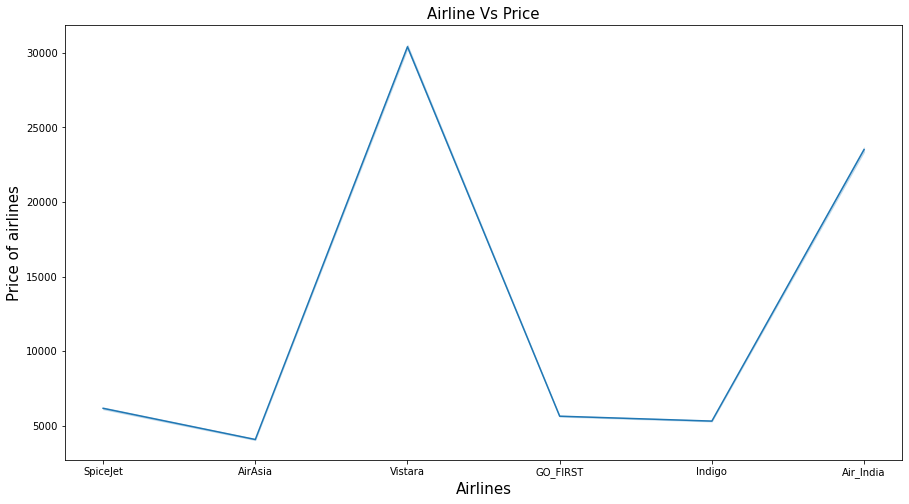

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='airline',y='price')
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.title('Airline Vs Price',fontsize=15)
plt.show()

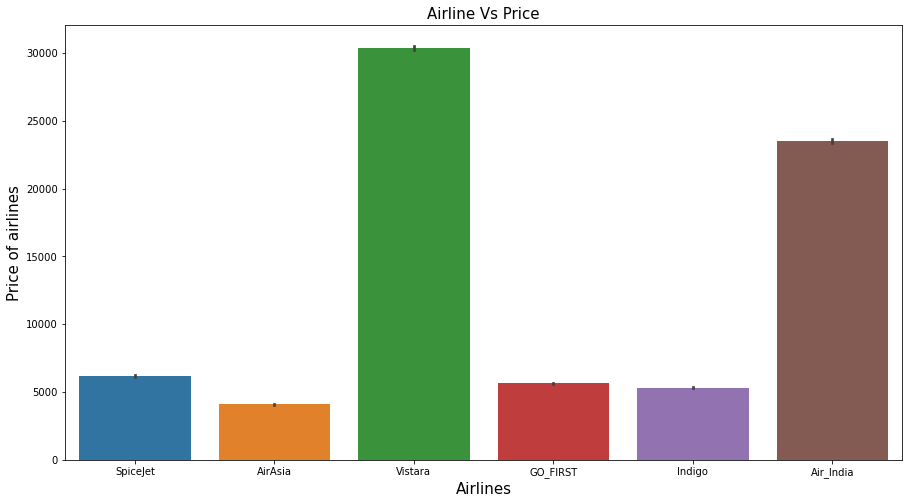

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='airline',y='price')
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.title('Airline Vs Price',fontsize=15)
plt.show()

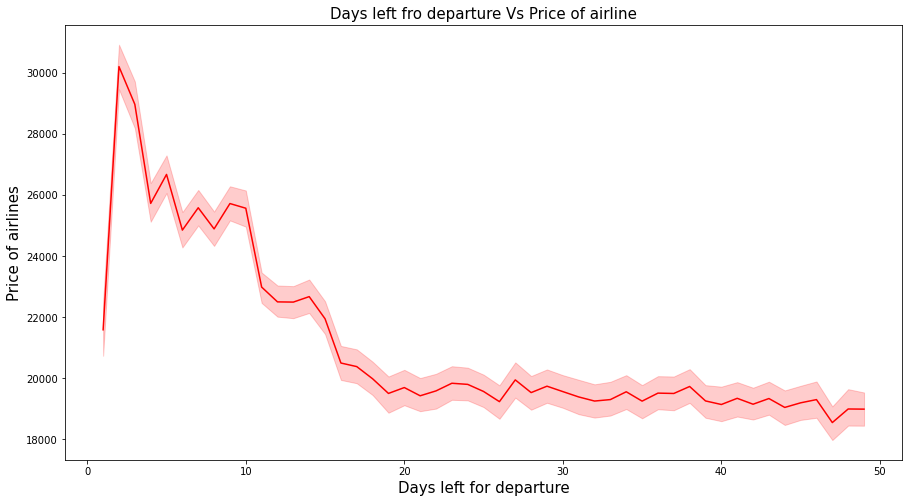

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.title('Days left fro departure Vs Price of airline',fontsize=15)
plt.show()

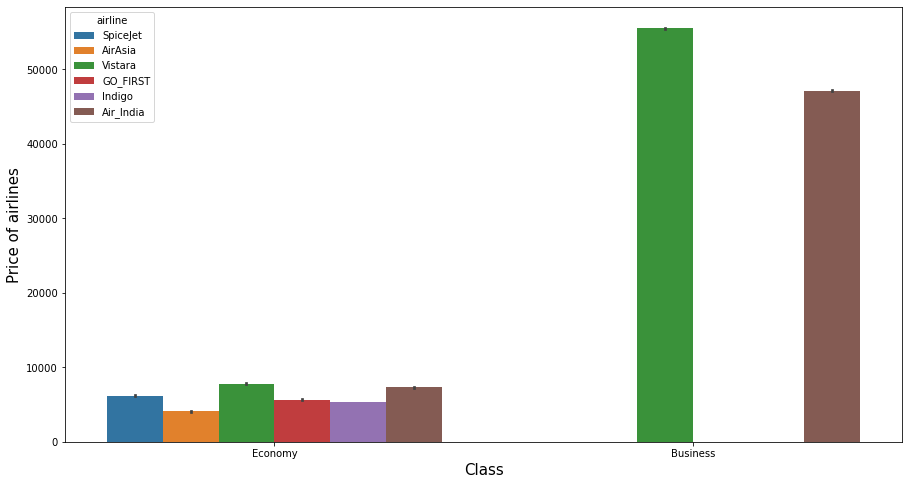

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='class',y='price',hue='airline')
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.show()

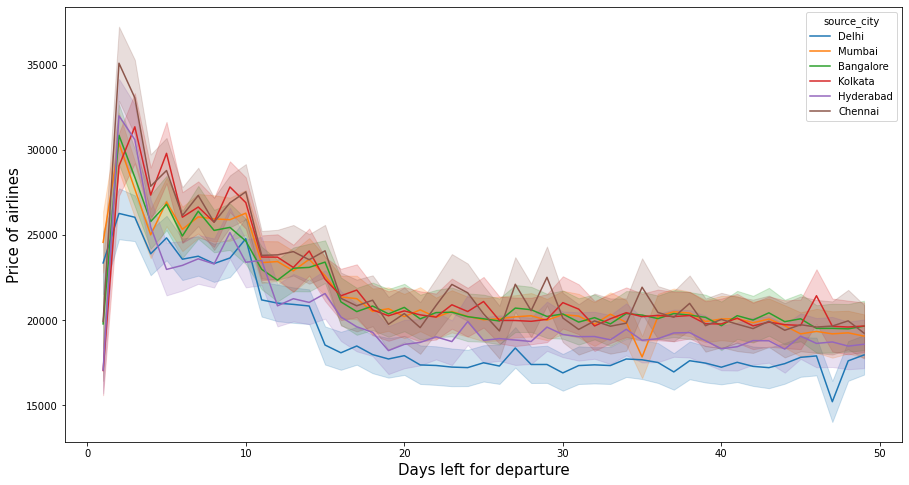

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='days_left',y='price',hue='source_city')
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.show()

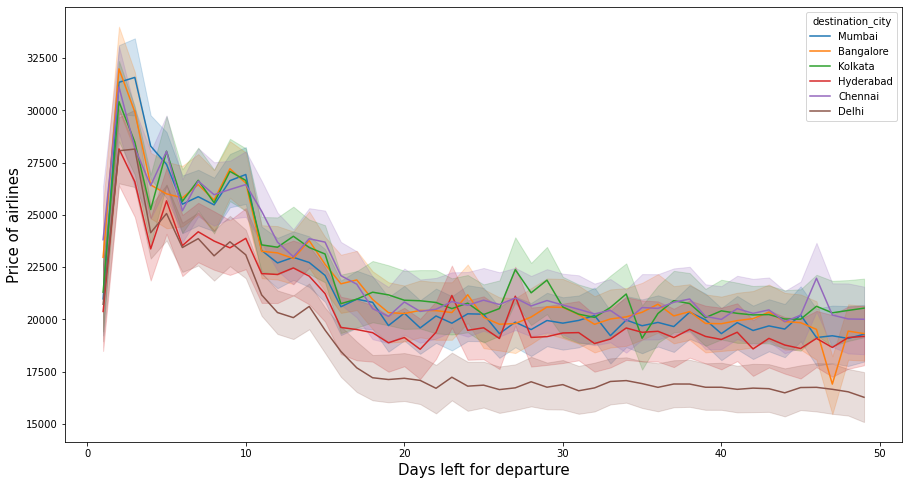

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='days_left',y='price',hue='destination_city')
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price of airlines',fontsize=15)
plt.show()

In [17]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [18]:
col=[]
for i in df.columns:
    if ((df[i].dtype=='object') & (i!='flight')):
        col.append(i)
print(col)        

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


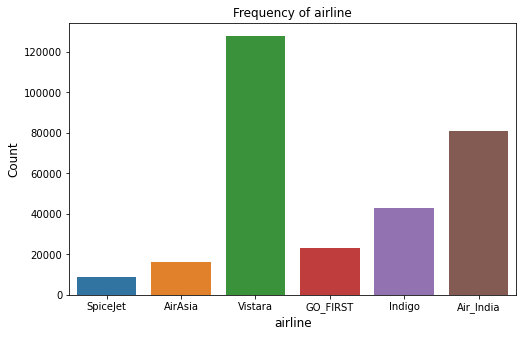

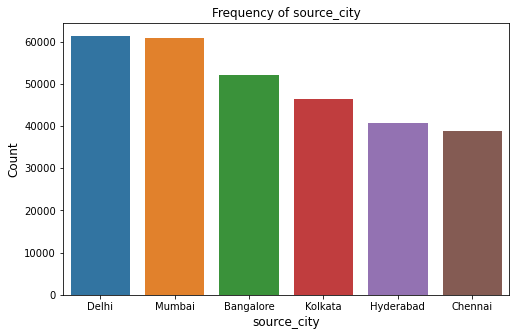

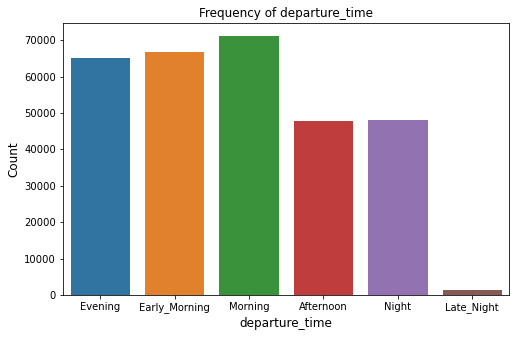

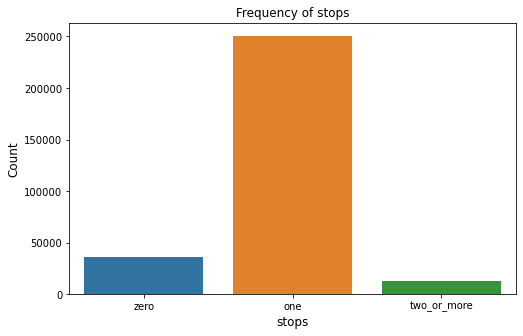

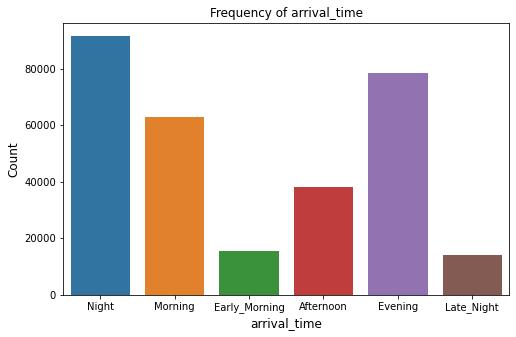

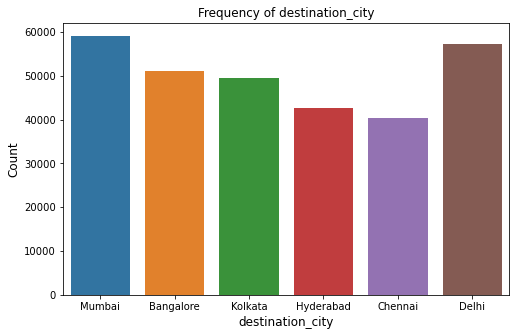

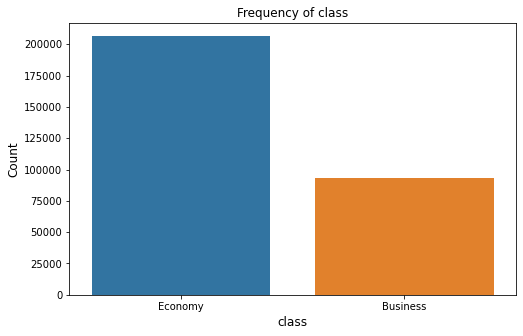

In [19]:
for i in col:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=i)
    plt.title("Frequency of {}".format(i))
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.show()

In [20]:
#Label encoding

columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class','flight']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in columns:
    df[i]=le.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


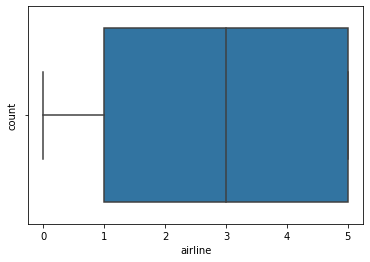

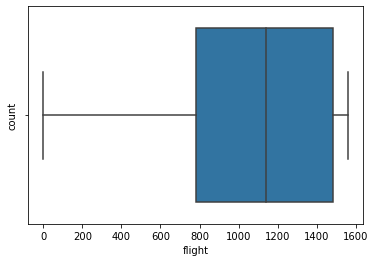

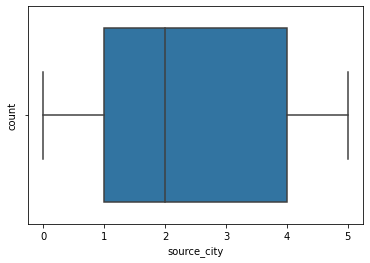

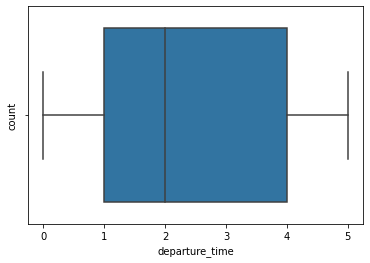

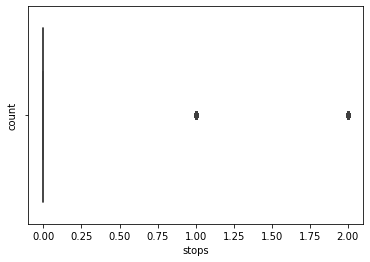

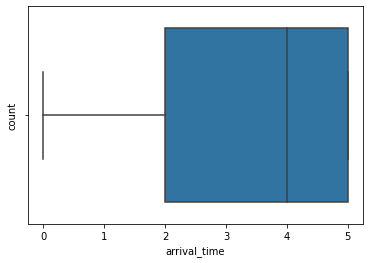

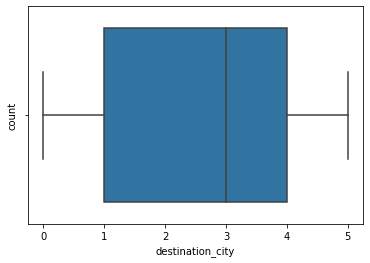

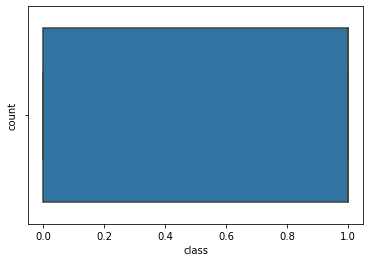

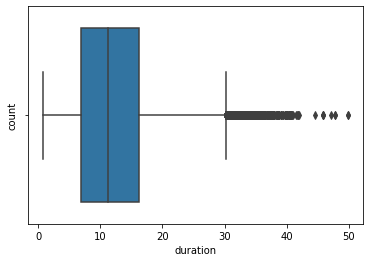

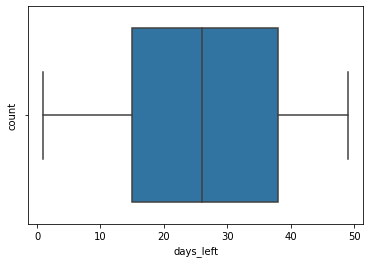

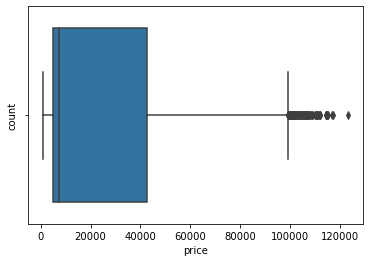

In [21]:
#Checking outliers

for i in df.columns:
    if (df[i].dtypes=='int64' or df[i].dtypes=='float64' or df[i].dtypes=='int32'):
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [22]:
#Feature Selection

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='Price')):
        col_list.append(col)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            features        VIF
0            airline   6.927685
1             flight  13.596592
2        source_city   3.229630
3     departure_time   2.899166
4              stops   1.438808
5       arrival_time   4.078358
6   destination_city   3.243276
7              class   9.549122
8           duration   5.304000
9          days_left   4.153978
10             price   7.218091


Here 'class' column has VIR greater than 5 so dropping 'Class column'

In [23]:
df=df.drop(columns=['class'])

In [24]:
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='Price')):
        col_list.append(col)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

           features        VIF
0           airline   6.761578
1            flight  13.042996
2       source_city   2.893977
3    departure_time   2.796983
4             stops   1.419719
5      arrival_time   3.725478
6  destination_city   2.830691
7          duration   4.765881
8         days_left   3.945985
9             price   2.155854


# Model Building

In [25]:
x=df.iloc[:,:-1]
y=df['price']

In [26]:
#Dividing data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
#Scaling data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [45]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [46]:

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

r2_score=r2_score(y_test,y_pred)
print('r2_score:',r2_score)

mean_absolute_error=mean_absolute_error(y_test,y_pred)
print('Mean_absolute_error:',mean_absolute_error)

mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_pred)
print('Mean_absolute_percentage_error:',mean_absolute_percentage_error)

mean_squared_error=mean_squared_error(y_test,y_pred)
print('Mean_squared_error:',mean_squared_error)

root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error:',root_mean_sq_error)

r2_score: 0.14752584387156276
Mean_absolute_error: 17829.290769842
Mean_absolute_percentage_error: 1.8786060408410392
Mean_squared_error: 439435316.15979296
Root_mean_squared_error: 20962.712519132463


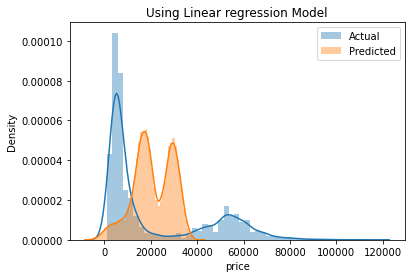

In [47]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.title('Using Linear regression Model')
plt.legend()
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

r2_score=r2_score(y_test,y_pred)
print('r2_score:',r2_score)

mean_absolute_error=mean_absolute_error(y_test,y_pred)
print('Mean_absolute_error:',mean_absolute_error)

mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_pred)
print('Mean_absolute_percentage_error:',mean_absolute_percentage_error)

mean_squared_error=mean_squared_error(y_test,y_pred)
print('Mean_squared_error:',mean_squared_error)

root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error:',root_mean_sq_error)

r2_score: -0.323718229990015
Mean_absolute_error: 18854.439302687595
Mean_absolute_percentage_error: 1.7293930426021011
Mean_squared_error: 682353282.7598168
Root_mean_squared_error: 26121.892786699373


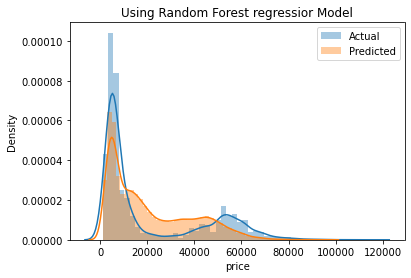

In [42]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.title('Using Random Forest regressior Model')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

r2_score=r2_score(y_test,y_pred)
print('r2_score:',r2_score)

mean_absolute_error=mean_absolute_error(y_test,y_pred)
print('Mean_absolute_error:',mean_absolute_error)

mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_pred)
print('Mean_absolute_percentage_error:',mean_absolute_percentage_error)

mean_squared_error=mean_squared_error(y_test,y_pred)
print('Mean_squared_error:',mean_squared_error)

root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root_mean_squared_error:',root_mean_sq_error)

r2_score: -0.9462779693740062
Mean_absolute_error: 22225.513906703756
Mean_absolute_percentage_error: 2.0360164463925496
Mean_squared_error: 1003271792.6499215
Root_mean_squared_error: 31674.465941037135


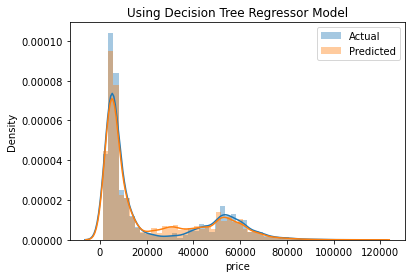

In [54]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.title('Using Decision Tree Regressor Model')
plt.show()